In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import pandas as pd


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


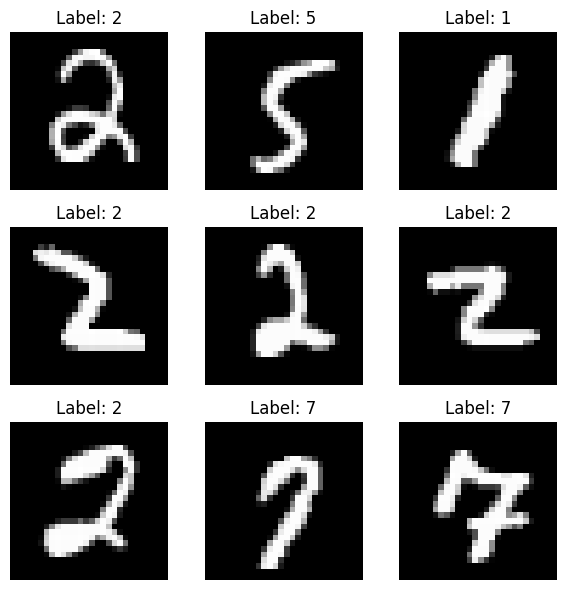

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, x_train.shape[0])
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input (28x28 images with 1 channel)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [6]:
# Create CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8522 - loss: 0.4647 - val_accuracy: 0.9833 - val_loss: 0.0502
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9749 - loss: 0.0842 - val_accuracy: 0.9874 - val_loss: 0.0364
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9829 - loss: 0.0580 - val_accuracy: 0.9889 - val_loss: 0.0322
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9849 - loss: 0.0482 - val_accuracy: 0.9899 - val_loss: 0.0272
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9882 - loss: 0.0390 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9913 - val_loss: 0.0243
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9913 - val_loss: 0.0267
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9914 - loss: 0.0263 - val_accuracy: 0

In [8]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9922 - loss: 0.0282
Test Accuracy: 0.9937999844551086


In [10]:
from sklearn.metrics import classification_report

# Predict labels on the test set
y_pred_probs = model.predict(x_test)  # Get probability predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)
# Generate classification report
report = classification_report(y_true, y_pred, digits=4, output_dict=True)

# Extract per-class accuracy
per_class_accuracy = {f"Digit {i}": report[str(i)]['recall'] for i in range(10)}

# Display per-class accuracy
for digit, acc in per_class_accuracy.items():
    print(f"{digit}: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Digit 0: 0.9939
Digit 1: 0.9991
Digit 2: 0.9971
Digit 3: 0.9970
Digit 4: 0.9990
Digit 5: 0.9899
Digit 6: 0.9937
Digit 7: 0.9912
Digit 8: 0.9918
Digit 9: 0.9841


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


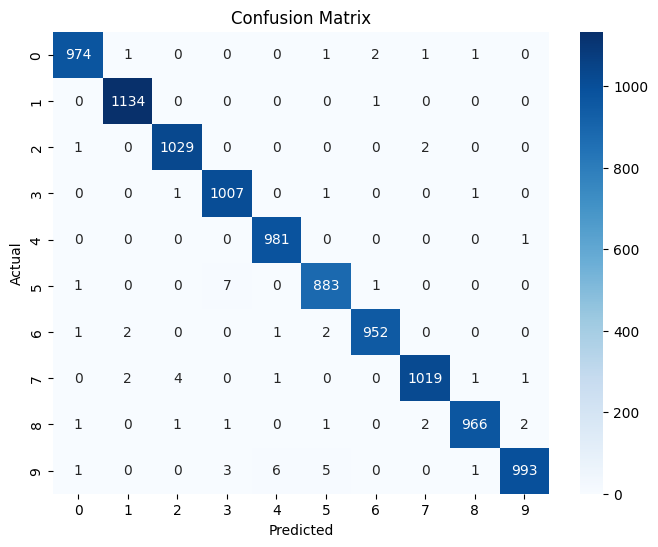

In [11]:
# Predict class labels
y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
print("Classification Report:\n", classification_report(y_true, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



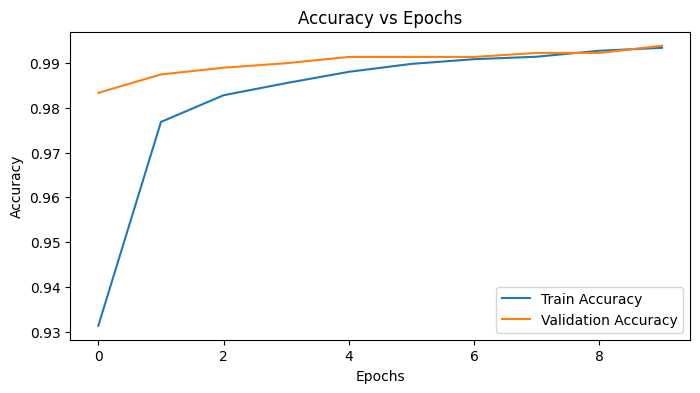

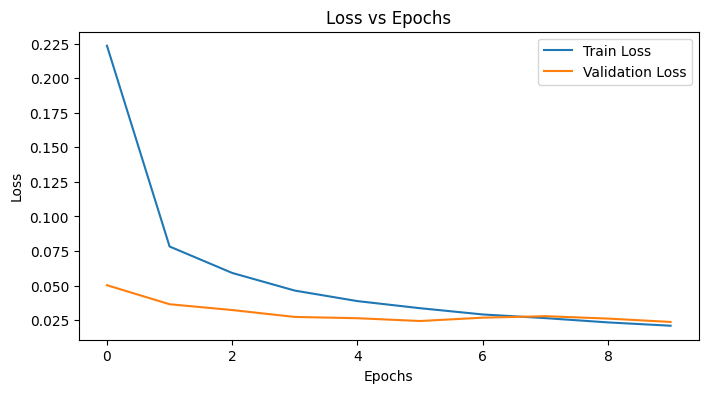

In [13]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

# Plot accuracy
plt.figure(figsize=(8,4))
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8,4))
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [14]:
# Function to build different models
def build_model(num_conv_layers=2, use_dropout=True, dense_units=128, kernel_size=(3,3)):
    model = Sequential()

    # First Conv Layer (Always Present)
    model.add(Conv2D(32, kernel_size, activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))

    # Optional Second Conv Layer
    if num_conv_layers == 2:
        model.add(Conv2D(64, kernel_size, activation='relu'))
        model.add(MaxPooling2D((2,2)))

    model.add(Flatten())

    # Dense Layer (Can change size)
    model.add(Dense(dense_units, activation='relu'))

    # Optional Dropout Layer
    if use_dropout:
        model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(10, activation='softmax'))

    # Compile Model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# Define model variations
models = {
    "Baseline Model": build_model(num_conv_layers=2, use_dropout=True, dense_units=128, kernel_size=(3,3)),
    "Without Dropout": build_model(num_conv_layers=2, use_dropout=False, dense_units=128, kernel_size=(3,3)),
    "Without Second Conv Layer": build_model(num_conv_layers=1, use_dropout=True, dense_units=128, kernel_size=(3,3)),
    "Smaller Dense Layer": build_model(num_conv_layers=2, use_dropout=True, dense_units=64, kernel_size=(3,3)),
    "Larger Kernel Size": build_model(num_conv_layers=2, use_dropout=True, dense_units=128, kernel_size=(5,5))
}

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:

# Train and evaluate models
histories = {}
test_accuracies = {}

for name, model in models.items():
    print(f"\nTraining {name}...\n")
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64, verbose=1)
    histories[name] = history
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies[name] = test_acc


Training Baseline Model...

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8401 - loss: 0.5114 - val_accuracy: 0.9838 - val_loss: 0.0524
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9733 - loss: 0.0950 - val_accuracy: 0.9868 - val_loss: 0.0390
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9800 - loss: 0.0671 - val_accuracy: 0.9889 - val_loss: 0.0321
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9853 - loss: 0.0504 - val_accuracy: 0.9902 - val_loss: 0.0287
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9902 - val_loss: 0.0286

Training Without Dropout...

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8841 - loss: 0.3823 - val_accuracy: 0.9859 - val_loss: 0.0454
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9837 - loss: 0.0529 - val_accuracy: 0.9884 - val_loss: 0.0370
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step 

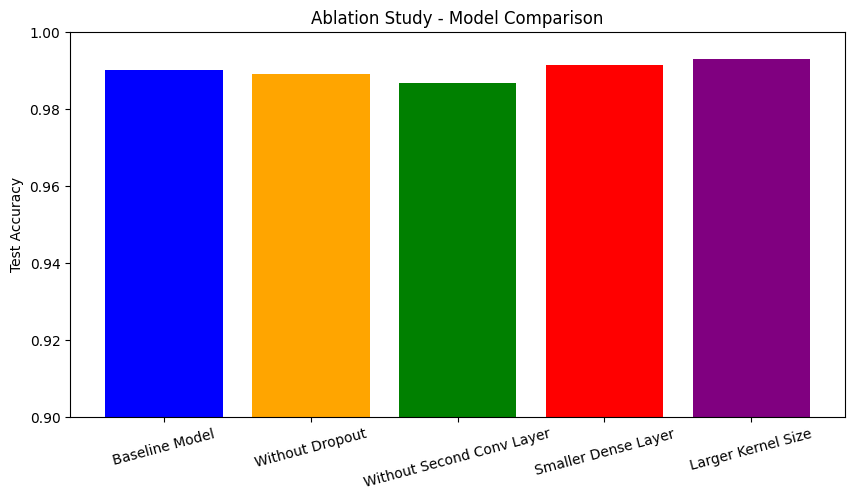

In [17]:
# Plot accuracy comparison
plt.figure(figsize=(10,5))
plt.bar(test_accuracies.keys(), test_accuracies.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel("Test Accuracy")
plt.title("Ablation Study - Model Comparison")
plt.ylim(0.9, 1)
plt.xticks(rotation=15)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


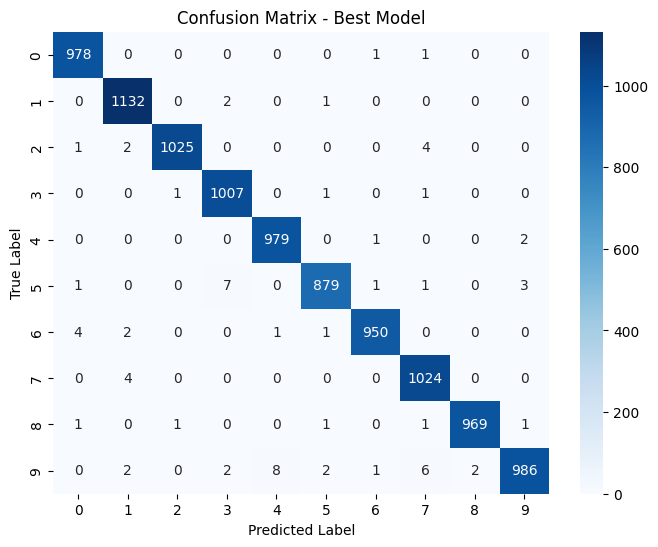

In [18]:
# Confusion matrix for the best model (Baseline)
best_model = models["Larger Kernel Size"]
y_pred = np.argmax(best_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Model")
plt.show()

In [19]:
print("Classification Report for Best Model:\n", classification_report(y_true, y_pred))

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [21]:
import numpy as np
from scipy.stats import norm, ttest_1samp

# Define variables
n = len(y_test)  # Number of test samples
model_accuracy = test_acc  # Test accuracy from model evaluation
baseline_accuracy = 0.90  # Hypothetical baseline (e.g., 90%)
alpha = 0.05  # Significance level

# Apply Z-test
z_score = (model_accuracy - baseline_accuracy) / np.sqrt((baseline_accuracy * (1 - baseline_accuracy)) / n)
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

print(f"Z-test Results:")
print(f"----------------")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value_z:.4f}")

if p_value_z < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference between the model's accuracy and the baseline.")

print("\n")  # For readability

# Apply T-test
sample_accuracies = np.random.binomial(n, model_accuracy, size=30) / n  # Simulated accuracies from binomial distribution
t_stat, p_value_t = ttest_1samp(sample_accuracies, baseline_accuracy)

print(f"T-test Results:")
print(f"----------------")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_t:.4f}")

if p_value_t < alpha:
    print("Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).")
else:
    print("Conclusion: We accept the null hypothesis (H₀). There is no significant difference between the model's accuracy and the baseline.")


Z-test Results:
----------------
Z-score: 30.9667
P-value: 0.0000
Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).


T-test Results:
----------------
T-statistic: 478.6550
P-value: 0.0000
Conclusion: We reject the null hypothesis (H₀). The model's accuracy is significantly different from the baseline accuracy (90%).
